Case study

In [2]:
#Načtení knihoven
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1, Zosumarizujte měsíční prodejní trendy 


In [3]:
#Načtení dat
sales_data = pd.read_csv('Sales data.csv', sep=';')
sales_data

,Date,Branch,Make,Model,Quantity,Price per Unit
0,02.01.2023,Praha,Škoda,Octavia,13.0,7 000 €
1,05.01.2023,Liberec,Škoda,Octavia,6.0,7 000 €
2,31.01.2023,Brno,Škoda,Octavia,10.0,7 000 €
3,09.01.2023,Liberec,Škoda,Fabia,7.0,4 000 €
4,05.02.2023,Praha,Volkswagen,Passat,10.0,10 000 €
5,13.01.2023,Brno,Volkswagen,Passat,4.0,10 000 €
6,08.01.2023,Praha,Volkswagen,Passat,2.0,10 000 €
7,10.01.2023,Brno,Suzuki,Swift,4.0,5 000 €
8,27.03.2023,Liberec,Suzuki,Swift,3.0,5 000 €
9,01.03.2023,Liberec,Škoda,Octavia,4.0,7 000 €


In [4]:
#Úprava sloupce datum
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_4528\2232827138.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_data['Date'] = pd.to_datetime(sales_data['Date'])


In [5]:
#Oprava chybného roku v datech
sales_data.loc[sales_data['Date'] == '1900-01-25', 'Date'] = '2023-01-25'
sales_data

,Date,Branch,Make,Model,Quantity,Price per Unit
0,2023-02-01,Praha,Škoda,Octavia,13.0,7 000 €
1,2023-05-01,Liberec,Škoda,Octavia,6.0,7 000 €
2,2023-01-31,Brno,Škoda,Octavia,10.0,7 000 €
3,2023-09-01,Liberec,Škoda,Fabia,7.0,4 000 €
4,2023-05-02,Praha,Volkswagen,Passat,10.0,10 000 €
5,2023-01-13,Brno,Volkswagen,Passat,4.0,10 000 €
6,2023-08-01,Praha,Volkswagen,Passat,2.0,10 000 €
7,2023-10-01,Brno,Suzuki,Swift,4.0,5 000 €
8,2023-03-27,Liberec,Suzuki,Swift,3.0,5 000 €
9,2023-01-03,Liberec,Škoda,Octavia,4.0,7 000 €


In [6]:
#Vytvoření sloupce Month
sales_data['Month'] = sales_data['Date'].dt.to_period('M')
sales_data

,Date,Branch,Make,Model,Quantity,Price per Unit,Month
0,2023-02-01,Praha,Škoda,Octavia,13.0,7 000 €,2023-02
1,2023-05-01,Liberec,Škoda,Octavia,6.0,7 000 €,2023-05
2,2023-01-31,Brno,Škoda,Octavia,10.0,7 000 €,2023-01
3,2023-09-01,Liberec,Škoda,Fabia,7.0,4 000 €,2023-09
4,2023-05-02,Praha,Volkswagen,Passat,10.0,10 000 €,2023-05
5,2023-01-13,Brno,Volkswagen,Passat,4.0,10 000 €,2023-01
6,2023-08-01,Praha,Volkswagen,Passat,2.0,10 000 €,2023-08
7,2023-10-01,Brno,Suzuki,Swift,4.0,5 000 €,2023-10
8,2023-03-27,Liberec,Suzuki,Swift,3.0,5 000 €,2023-03
9,2023-01-03,Liberec,Škoda,Octavia,4.0,7 000 €,2023-01


In [7]:
#Zjištění datového typu sloupců k provedení výpočtu
column_types = sales_data.dtypes
column_types

Date              datetime64[ns]
Branch                    object
Make                      object
Model                     object
Quantity                 float64
Price per Unit            object
Month                  period[M]
dtype: object

In [8]:
#Změna datového typu u sloupce Quantity
sales_data['Quantity'] = pd.to_numeric(sales_data['Quantity'], errors='coerce').fillna(0)
sales_data

,Date,Branch,Make,Model,Quantity,Price per Unit,Month
0,2023-02-01,Praha,Škoda,Octavia,13.0,7 000 €,2023-02
1,2023-05-01,Liberec,Škoda,Octavia,6.0,7 000 €,2023-05
2,2023-01-31,Brno,Škoda,Octavia,10.0,7 000 €,2023-01
3,2023-09-01,Liberec,Škoda,Fabia,7.0,4 000 €,2023-09
4,2023-05-02,Praha,Volkswagen,Passat,10.0,10 000 €,2023-05
5,2023-01-13,Brno,Volkswagen,Passat,4.0,10 000 €,2023-01
6,2023-08-01,Praha,Volkswagen,Passat,2.0,10 000 €,2023-08
7,2023-10-01,Brno,Suzuki,Swift,4.0,5 000 €,2023-10
8,2023-03-27,Liberec,Suzuki,Swift,3.0,5 000 €,2023-03
9,2023-01-03,Liberec,Škoda,Octavia,4.0,7 000 €,2023-01


In [9]:
#Zjištění datového typu u sloupce Price per Unit (je potřeba se zbavit měnového znaku '€', aby bylo možné provést výpočet )
sales_data['Price per Unit'].unique()

array(['7 000 €', '4 000 €', '10 000 €', '5 000 €'], dtype=object)

In [10]:
#Změna datového typu pro sloupec Price per Unit
sales_data['Price per Unit'] = pd.to_numeric(sales_data['Price per Unit'].astype(str).str.replace('[€\s,]', '', regex=True), errors='coerce')
sales_data

,Date,Branch,Make,Model,Quantity,Price per Unit,Month
0,2023-02-01,Praha,Škoda,Octavia,13.0,7000,2023-02
1,2023-05-01,Liberec,Škoda,Octavia,6.0,7000,2023-05
2,2023-01-31,Brno,Škoda,Octavia,10.0,7000,2023-01
3,2023-09-01,Liberec,Škoda,Fabia,7.0,4000,2023-09
4,2023-05-02,Praha,Volkswagen,Passat,10.0,10000,2023-05
5,2023-01-13,Brno,Volkswagen,Passat,4.0,10000,2023-01
6,2023-08-01,Praha,Volkswagen,Passat,2.0,10000,2023-08
7,2023-10-01,Brno,Suzuki,Swift,4.0,5000,2023-10
8,2023-03-27,Liberec,Suzuki,Swift,3.0,5000,2023-03
9,2023-01-03,Liberec,Škoda,Octavia,4.0,7000,2023-01


In [11]:
#Výpočet pro sloupec Sales
sales_data['Sales'] = sales_data['Quantity']*sales_data['Price per Unit']
sales_data

,Date,Branch,Make,Model,Quantity,Price per Unit,Month,Sales
0,2023-02-01,Praha,Škoda,Octavia,13.0,7000,2023-02,91000.0
1,2023-05-01,Liberec,Škoda,Octavia,6.0,7000,2023-05,42000.0
2,2023-01-31,Brno,Škoda,Octavia,10.0,7000,2023-01,70000.0
3,2023-09-01,Liberec,Škoda,Fabia,7.0,4000,2023-09,28000.0
4,2023-05-02,Praha,Volkswagen,Passat,10.0,10000,2023-05,100000.0
5,2023-01-13,Brno,Volkswagen,Passat,4.0,10000,2023-01,40000.0
6,2023-08-01,Praha,Volkswagen,Passat,2.0,10000,2023-08,20000.0
7,2023-10-01,Brno,Suzuki,Swift,4.0,5000,2023-10,20000.0
8,2023-03-27,Liberec,Suzuki,Swift,3.0,5000,2023-03,15000.0
9,2023-01-03,Liberec,Škoda,Octavia,4.0,7000,2023-01,28000.0


In [12]:
#Monthly sales per Month
monthly_sales = sales_data.groupby('Month')['Sales'].sum()
monthly_sales

Month
2023-01    168000.0
2023-02    193000.0
2023-03    164000.0
2023-04     60000.0
2023-05    192000.0
2023-08     60000.0
2023-09     28000.0
2023-10     35000.0
2023-12     14000.0
Freq: M, Name: Sales, dtype: float64

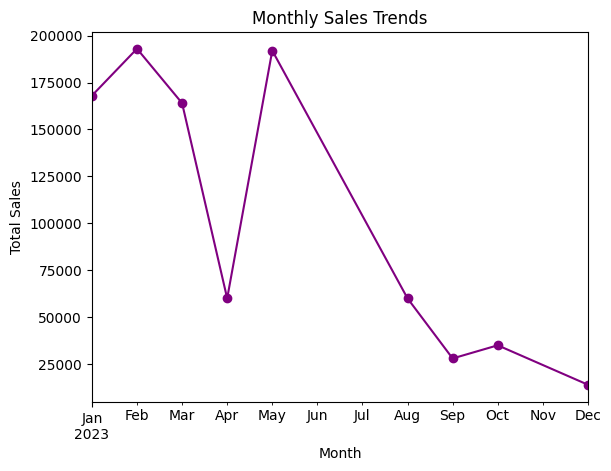

In [13]:
#Graf - Monthly Sales Trends (Zosumarizujte měsíční prodejní trendy)
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [14]:
#Vytvoření sumarizační tabulky pro jednotlivý model za měsíc
monthly_car_sales = sales_data.groupby(['Model', ('Month')])['Sales'].sum().reset_index()
monthly_car_sales


,Model,Month,Sales
0,Fabia,2023-02,8000.0
1,Fabia,2023-03,24000.0
2,Fabia,2023-09,28000.0
3,Octavia,2023-01,98000.0
4,Octavia,2023-02,140000.0
5,Octavia,2023-05,42000.0
6,Octavia,2023-12,14000.0
7,Passat,2023-01,70000.0
8,Passat,2023-03,100000.0
9,Passat,2023-04,60000.0


In [15]:
#Vytvoření sumarizační tabulky s nejvýdělečnějšími auty za každý měsíc
most_sold_cars = monthly_car_sales.loc[monthly_car_sales.groupby('Month')['Sales'].idxmax()]
most_sold_cars['Month'] = most_sold_cars['Month'].astype(str)
most_sold_cars['Month'] = most_sold_cars['Month'].astype(str).str[-2:].astype(int)
most_sold_cars

,Model,Month,Sales
3,Octavia,1,98000.0
4,Octavia,2,140000.0
8,Passat,3,100000.0
9,Passat,4,60000.0
10,Passat,5,150000.0
14,Swift,8,40000.0
2,Fabia,9,28000.0
15,Swift,10,35000.0
6,Octavia,12,14000.0


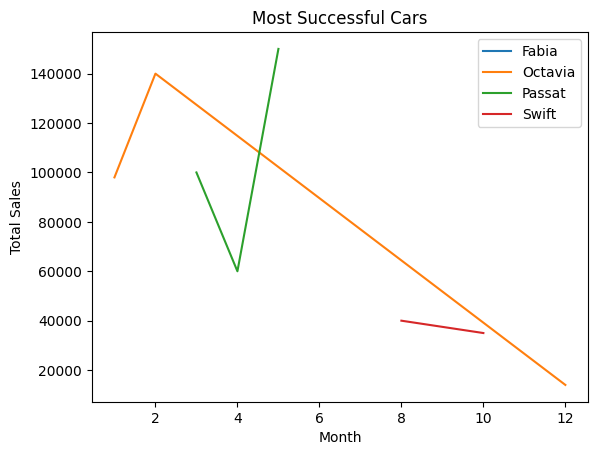

In [63]:
#Vývoj nejvíc výdělečných automobilů po měsících
for car_model, group in most_sold_cars.groupby('Model'):
    plt.plot(group['Month'], group['Sales'], label=car_model)

plt.title('Most Successful Cars')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

2, Identifikujte nejprodávanější automobily za každý měsíc a sledujte jejich vývoj

In [53]:
#Nejprodávanější automobily za každý měsíc
count_sales = sales_data.groupby(['Month', 'Model']).size().reset_index(name='Count')
count_sales

,Month,Model,Count
0,2023-01,Octavia,2
1,2023-01,Passat,2
2,2023-02,Fabia,1
3,2023-02,Octavia,3
4,2023-02,Swift,1
5,2023-03,Fabia,1
6,2023-03,Passat,1
7,2023-03,Swift,2
8,2023-04,Passat,1
9,2023-05,Octavia,1


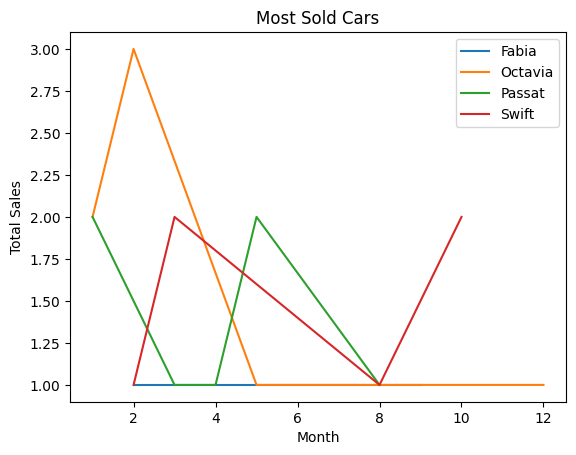

In [62]:
#Graf nejprodávanějších automobilů
count_sales['Month'] = count_sales['Month'].astype(str)
count_sales['Month'] = count_sales['Month'].astype(str).str[-2:].astype(int)
for car_model, group in count_sales.groupby('Model'):
    plt.plot(group['Month'], group['Count'], label=car_model)

plt.title('Most Sold Cars')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [54]:
#sumarizační tabulka
count_sales_sum = count_sales.loc[count_sales.groupby('Month')['Count'].idxmax()]
count_sales_sum['Month'] = count_sales_sum['Month'].astype(str)
count_sales_sum['Month'] = count_sales_sum['Month'].astype(str).str[-2:].astype(int)
count_sales_sum

,Month,Model,Count
0,1,Octavia,2
3,2,Octavia,3
7,3,Swift,2
8,4,Passat,1
10,5,Passat,2
11,8,Passat,1
13,9,Fabia,1
14,10,Swift,2
15,12,Octavia,1


3, Identifikujte nejúspěšnější prodejny za každý měsíc

In [17]:
#Nejúspěšnější prodejny
branch_sales = sales_data.groupby(['Month', 'Branch'])['Sales'].sum().reset_index()
branch_sales

,Month,Branch,Sales
0,2023-01,Brno,110000.0
1,2023-01,Liberec,28000.0
2,2023-01,Praha,30000.0
3,2023-02,Brno,45000.0
4,2023-02,Liberec,8000.0
5,2023-02,Praha,140000.0
6,2023-03,Brno,125000.0
7,2023-03,Liberec,15000.0
8,2023-03,Praha,24000.0
9,2023-04,Brno,60000.0


In [18]:
#sumarizační tabulka pro nejúspěšnější prodejny
most_successful_branch = branch_sales.loc[branch_sales.groupby('Month')['Sales'].idxmax()]
most_successful_branch['Month'] = most_successful_branch['Month'].astype(str).str[-2:].astype(int)
most_successful_branch

,Month,Branch,Sales
0,1,Brno,110000.0
5,2,Praha,140000.0
6,3,Brno,125000.0
9,4,Brno,60000.0
11,5,Praha,150000.0
12,8,Brno,40000.0
14,9,Liberec,28000.0
15,10,Brno,20000.0
17,12,Praha,14000.0


In [19]:
#nejúspěšnější prodejny na počty vítězných měsíců
winner_branch = most_successful_branch['Branch'].value_counts()
winner_branch

Brno       5
Praha      3
Liberec    1
Name: Branch, dtype: int64

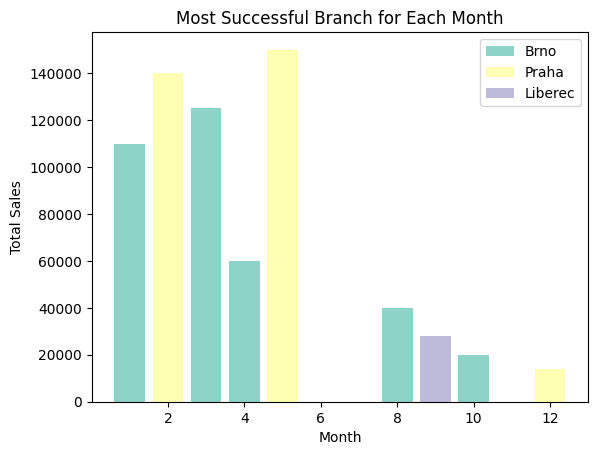

In [20]:
#Graf pro nejúspěšnější prodejny
colors = plt.cm.Set3.colors
for branch, color in zip(most_successful_branch['Branch'].unique(), colors):
    branch_data = most_successful_branch[most_successful_branch['Branch'] == branch]
    plt.bar(branch_data['Month'], branch_data['Sales'], color=color, label=branch)

plt.title('Most Successful Branch for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

4, Vytvořte grafy zobrazující změny v množství automobilů na skladě pro každý měsíc

In [21]:
#Načtení dat
stock_data = pd.read_csv('Stock data.csv', sep=';')
stock_data

,Product ID,Date,Quantity in Stock,Warehouse
0,Volkswagen Passat,18.03.2023,95,Brno
1,Škoda Octavia,02.01.2023,100,Praha
2,Volkswagen Passat,02.02.2023,80,Praha
3,Suzuki Swift,03.01.2023,80,Brno
4,Škoda Octavia,14.01.2023,80,Praha
5,Volkswagen Passat,05.01.2023,120,Praha
6,Suzuki Swift,31.01.2023,90,Brno
7,Škoda Octavia,04.02.2023,60,Liberec
8,Suzuki Swift,10.02.2023,70,Brno
9,Volkswagen Passat,15.02.2023,60,Praha


In [22]:
#vytvoření sloupce pro měsíc
stock_data['Month'] = pd.to_datetime(stock_data['Date'], format='%d.%m.%Y').dt.month
stock_data

,Product ID,Date,Quantity in Stock,Warehouse,Month
0,Volkswagen Passat,18.03.2023,95,Brno,3
1,Škoda Octavia,02.01.2023,100,Praha,1
2,Volkswagen Passat,02.02.2023,80,Praha,2
3,Suzuki Swift,03.01.2023,80,Brno,1
4,Škoda Octavia,14.01.2023,80,Praha,1
5,Volkswagen Passat,05.01.2023,120,Praha,1
6,Suzuki Swift,31.01.2023,90,Brno,1
7,Škoda Octavia,04.02.2023,60,Liberec,2
8,Suzuki Swift,10.02.2023,70,Brno,2
9,Volkswagen Passat,15.02.2023,60,Praha,2


In [23]:
#Sumarizační tabulka skladových zásob
monthly_stock = stock_data.groupby(['Month', 'Warehouse'])['Quantity in Stock'].sum().reset_index()
monthly_stock

,Month,Warehouse,Quantity in Stock
0,1,Brno,170
1,1,Liberec,50
2,1,Praha,300
3,2,Brno,70
4,2,Liberec,230
5,2,Praha,140
6,3,Brno,180
7,3,Liberec,55
8,3,Praha,140


In [24]:
#Kontingenční tabulka skladových zásob
pivot_stock = monthly_stock.pivot(index='Month', columns='Warehouse', values='Quantity in Stock').fillna(0)
pivot_stock

Warehouse,Brno,Liberec,Praha
Month,,,
1,170,50,300
2,70,230,140
3,180,55,140


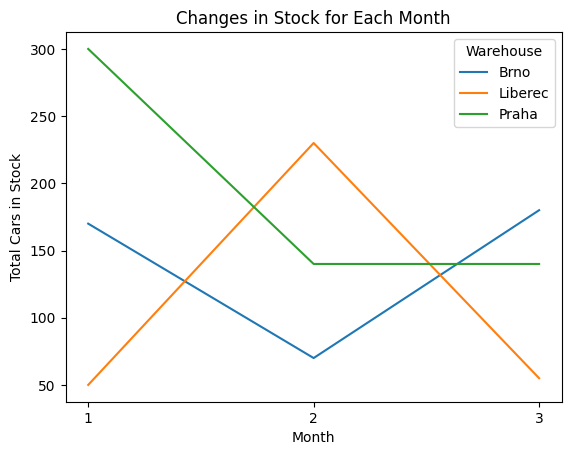

In [25]:
#Graf skladových zásob
pivot_stock.plot(kind='line')
plt.xticks([1, 2, 3])
plt.title('Changes in Stock for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Cars in Stock')
plt.legend(title='Warehouse')
plt.show()

5, Porovnejte dostupnost automobilů v jednotlivých skladech v období ledna až března


In [26]:
#dostupnost automobilů v jednotlivých skladech
monthly_stock_product = stock_data.groupby(['Month', 'Warehouse', 'Product ID'])['Quantity in Stock'].sum().reset_index()
monthly_stock_product

,Month,Warehouse,Product ID,Quantity in Stock
0,1,Brno,Suzuki Swift,170
1,1,Liberec,Škoda Octavia,50
2,1,Praha,Volkswagen Passat,120
3,1,Praha,Škoda Octavia,180
4,2,Brno,Suzuki Swift,70
5,2,Liberec,Škoda Octavia,230
6,2,Praha,Volkswagen Passat,140
7,3,Brno,Volkswagen Passat,180
8,3,Liberec,Škoda Octavia,55
9,3,Praha,Suzuki Swift,140


In [27]:
#kontingenční tabulka pro dostupnost automobilů v jednotlivých skladech
pivot_stock_2 = monthly_stock_product.pivot(index='Warehouse', columns=['Month','Product ID'], values='Quantity in Stock').fillna(0)
pivot_stock_2

Month                 1                                            2  \
Product ID Suzuki Swift Škoda Octavia Volkswagen Passat Suzuki Swift   
Warehouse                                                              
Brno              170.0           0.0               0.0         70.0   
Liberec             0.0          50.0               0.0          0.0   
Praha               0.0         180.0             120.0          0.0   

Month                                                      3                \
Product ID Škoda Octavia Volkswagen Passat Volkswagen Passat Škoda Octavia   
Warehouse                                                                    
Brno                 0.0               0.0             180.0           0.0   
Liberec            230.0               0.0               0.0          55.0   
Praha                0.0             140.0               0.0           0.0   

Month                    
Product ID Suzuki Swift  
Warehouse                
Brno                0.0  
Liberec             0.0  
Praha             140.0

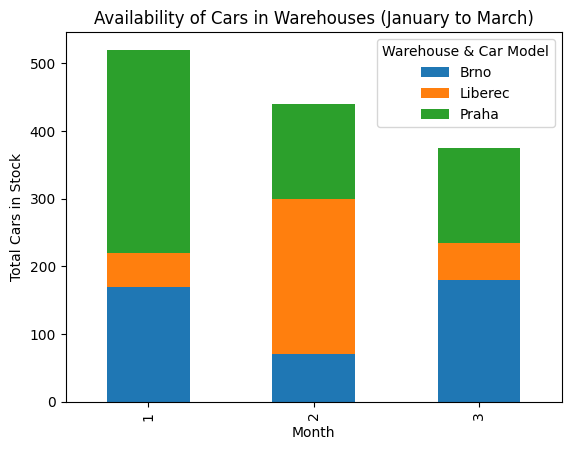

In [40]:
#Graf dostupnosti automobilů v jednotlivých skladech
pivot_stock.plot(kind='bar', stacked=True)
plt.title('Availability of Cars in Warehouses (January to March)')
plt.xlabel('Month')
plt.ylabel('Total Cars in Stock')
plt.legend(title='Warehouse & Car Model')
plt.show()

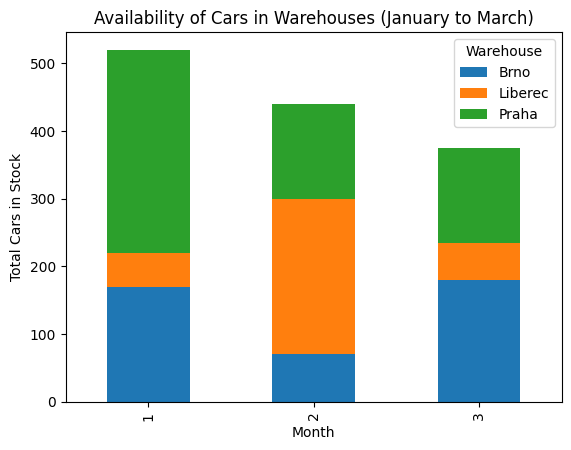

In [29]:
#graf dostupnosti jednotlivých automobilů v období leden až březen
pivot_stock.plot(kind='bar', stacked=True)
plt.title('Availability of Cars in Warehouses (January to March)')
plt.xlabel('Month')
plt.ylabel('Total Cars in Stock')
plt.legend(title='Warehouse')
plt.show()

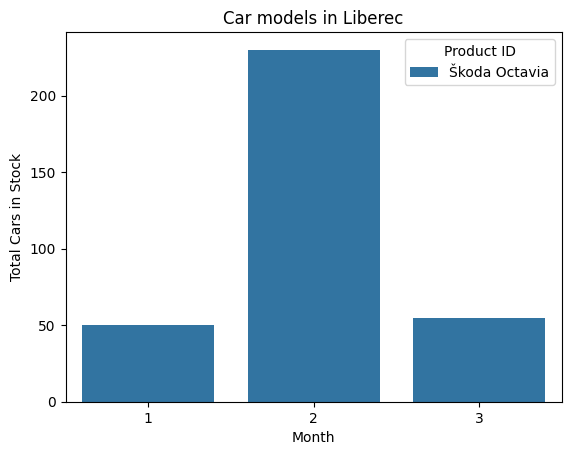

In [60]:
#Graf pro Liberec
Liberec = monthly_stock_product[monthly_stock_product['Warehouse'] == 'Liberec']
sns.barplot(x='Month', y='Quantity in Stock', hue='Product ID', data=Liberec, errorbar=None)
plt.title('Car models in Liberec')
plt.xlabel('Month')
plt.ylabel('Total Cars in Stock')
plt.show()

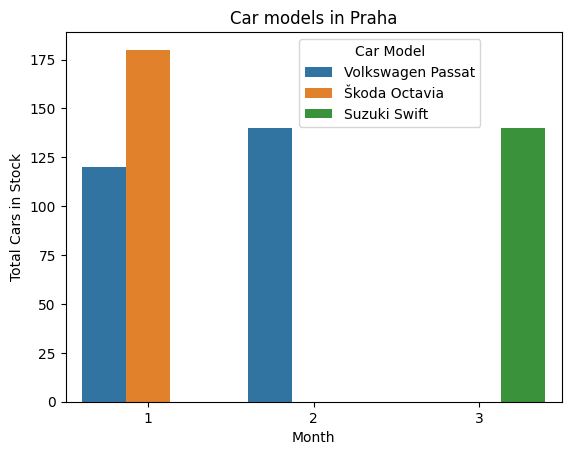

In [57]:
#Graf pro Prahu
Praha = monthly_stock_product[monthly_stock_product['Warehouse'] == 'Praha']
sns.barplot(x='Month', y='Quantity in Stock', hue='Product ID', data=Praha, errorbar=None)
plt.legend(title='Car Model', bbox_to_anchor=(0.85, 1), loc='upper right')
plt.title('Car models in Praha')
plt.xlabel('Month')
plt.ylabel('Total Cars in Stock')
plt.show()

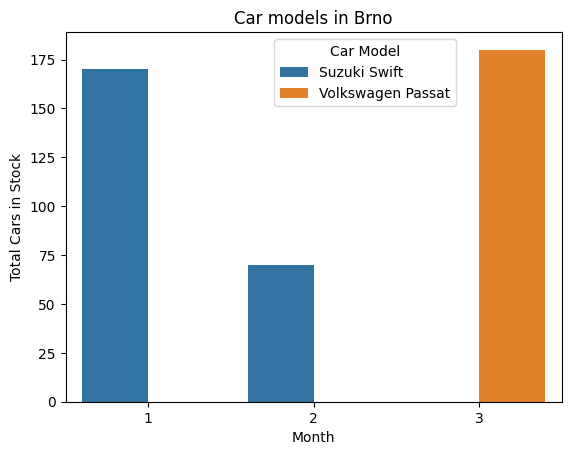

In [33]:
#Graf pro Brno
Brno = monthly_stock_product[monthly_stock_product['Warehouse'] == 'Brno']
sns.barplot(x='Month', y='Quantity in Stock', hue='Product ID', data=Brno, errorbar=None)
plt.legend(title='Car Model', bbox_to_anchor=(0.80, 1), loc='upper right')
plt.title('Car models in Brno')
plt.xlabel('Month')
plt.ylabel('Total Cars in Stock')
plt.show()

6, Identifikujte segmenty zákazníků na základě počtu zakoupených aut, členství v věrnostním programu a nejčastějších zakoupených automobilů


In [34]:
#Načtení dat
customer_data = pd.read_csv('Customer data.csv', sep=';')
customer_data

,Customer ID,Name,Age,Gender,Loyalty Program,Purchased Products
0,1,Peter,35,Male,Gold,"Škoda Octavia, Suzuki Swift"
1,2,Eva,28,Female,Silver,"Volkswagen Passat, Suzuki Swift"
2,3,Joseph,45,Male,Platinum,"Škoda Octavia, Volkswagen Passat, Suzuki Swift"
3,4,Anna,30,Female,Gold,"Volkswagen Passat, Volkswagen Passat, Škoda Oc..."
4,5,Michael,40,Male,Silver,"Suzuki Swift, Suzuki Swift, Suzuki Swift, Volk..."


In [35]:
#rozdělení sloupce purchased cars
customer_data_split =customer_data['Purchased Products'].str.split(', ', expand=True)
customer_data_split

,0,1,2,3,4
0,Škoda Octavia,Suzuki Swift,None,None,None
1,Volkswagen Passat,Suzuki Swift,None,None,None
2,Škoda Octavia,Volkswagen Passat,Suzuki Swift,None,None
3,Volkswagen Passat,Volkswagen Passat,Škoda Octavia,None,None
4,Suzuki Swift,Suzuki Swift,Suzuki Swift,Volkswagen Passat,Škoda Octavia


In [42]:
#seřazení dat do jednoho sloupce
stacked_products = customer_data_split.stack()
stacked_products

0  0        Škoda Octavia
   1         Suzuki Swift
1  0    Volkswagen Passat
   1         Suzuki Swift
2  0        Škoda Octavia
   1    Volkswagen Passat
   2         Suzuki Swift
3  0    Volkswagen Passat
   1    Volkswagen Passat
   2        Škoda Octavia
4  0         Suzuki Swift
   1         Suzuki Swift
   2         Suzuki Swift
   3    Volkswagen Passat
   4        Škoda Octavia
dtype: object

In [43]:
#počet jednotlivých modelů
value_counts = stacked_products.value_counts()
value_counts

Suzuki Swift         6
Volkswagen Passat    5
Škoda Octavia        4
dtype: int64

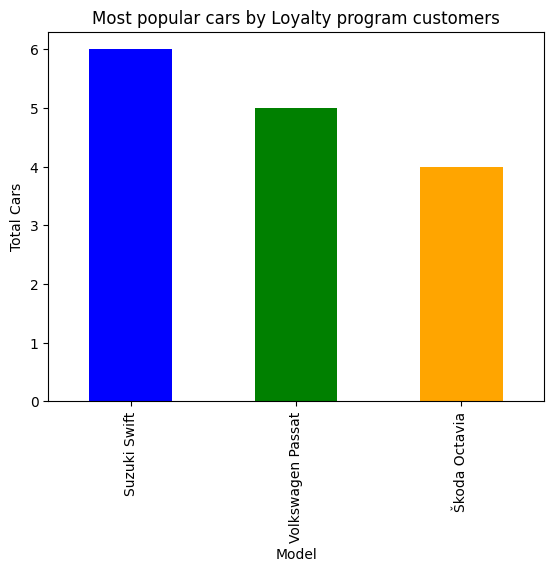

In [48]:
#graf pro nejoblíbenější automobily u zákazníků s věrnostným programem
colors = ['blue', 'green', 'orange']
value_counts.plot(kind='bar', color=colors)
plt.title('Most popular cars by Loyalty program customers')
plt.xlabel('Model')
plt.ylabel('Total Cars')
plt.show()

In [36]:
#výsledná tabulka
result_cd = pd.concat([customer_data, customer_data_split], axis=1)
result_cd

,Customer ID,Name,Age,Gender,Loyalty Program,Purchased Products,0,1,2,3,4
0,1,Peter,35,Male,Gold,"Škoda Octavia, Suzuki Swift",Škoda Octavia,Suzuki Swift,None,None,None
1,2,Eva,28,Female,Silver,"Volkswagen Passat, Suzuki Swift",Volkswagen Passat,Suzuki Swift,None,None,None
2,3,Joseph,45,Male,Platinum,"Škoda Octavia, Volkswagen Passat, Suzuki Swift",Škoda Octavia,Volkswagen Passat,Suzuki Swift,None,None
3,4,Anna,30,Female,Gold,"Volkswagen Passat, Volkswagen Passat, Škoda Oc...",Volkswagen Passat,Volkswagen Passat,Škoda Octavia,None,None
4,5,Michael,40,Male,Silver,"Suzuki Swift, Suzuki Swift, Suzuki Swift, Volk...",Suzuki Swift,Suzuki Swift,Suzuki Swift,Volkswagen Passat,Škoda Octavia


In [37]:
#počet hodnot u různých typů věrnotních programů
loyalty_program = result_cd['Loyalty Program'].value_counts()
loyalty_program

Gold        2
Silver      2
Platinum    1
Name: Loyalty Program, dtype: int64